In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file (already done in your code)
#--stepwise
csv_path = "/Users/amirgazar/Documents/GitHub/Decarbonization-Tradeoffs/2 Generation Expansion Model/5 Dispatch Curve/4 Final Results/1 Comprehensive Days Summary Results/Battery_Data.csv"
yearly_results = pd.read_csv(csv_path)

yearly_results = yearly_results[yearly_results['Pathway'] != 'A']
yearly_results['CO2_mtons'] = yearly_results['CO2_tons'] / 1e3

In [9]:
yearly_results

,Year,Simulation,Pathway,RP_mean,RP_max,RP_min,Battery_Discharges_GWh,Shortages_TWh,CO2_tons,CO2_mtons
0,2025,1,B2,0.180933,0.557290,0.015164,32.838469,0.011277,3.296391e+07,32963.906970
1,2026,1,B2,0.209108,0.634487,0.021430,41.101897,0.010456,3.206580e+07,32065.801197
2,2027,1,B2,0.240071,0.662526,0.022687,45.267365,0.006232,3.096352e+07,30963.516757
3,2028,1,B2,0.269006,0.714976,0.021887,58.693059,0.012704,3.009177e+07,30091.766991
4,2029,1,B2,0.299406,0.721631,0.024464,60.199707,0.005057,2.905141e+07,29051.405975
...,...,...,...,...,...,...,...,...,...,...
73,2046,1,C1,0.066304,0.220736,0.006671,56.773022,0.002686,2.711245e+05,271.124480
74,2047,1,C1,0.063250,0.206452,0.006277,31.536248,0.000050,2.023112e+05,202.311202
75,2048,1,C1,0.060646,0.203750,0.005886,16.502612,0.000000,1.396575e+05,139.657512
76,2049,1,C1,0.058184,0.195152,0.003939,6.878699,0.000000,1.161177e+05,116.117705


In [13]:
columns_to_summarize = ['RP_mean', 'Battery_Discharges_GWh', 'Shortages_TWh', 'CO2_mtons']  
yearly_results = yearly_results.groupby(['Pathway', 'Year'])[columns_to_summarize].mean().reset_index()
print(yearly_results.max())

Pathway                             C1
Year                              2050
RP_mean                       0.742934
Battery_Discharges_GWh     4328.639307
Shortages_TWh                 0.478411
CO2_mtons                 39146.674567
dtype: object


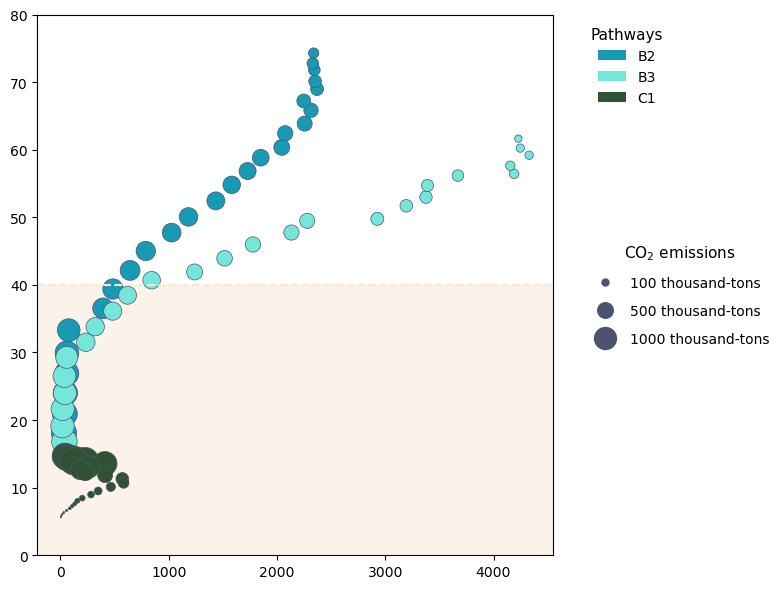

In [15]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Convert RP_mean to percentages for the y-axis
yearly_results["RP_mean_percent"] = yearly_results["RP_mean"] * 100

# Explicitly define improved pastel colors for each pathway
unique_pathways = yearly_results["Pathway"].unique()
pathway_colors = {
    "A": "grey",
    "B1": "#05445E",  # Muted pastel blue
    "B2": "#189AB4",  # Muted pastel light blue
    "B3": "#75E6DA",  # Muted pastel sky blue
    "C1": "#2F5233",  # Muted pastel lavender
    "C2": "#76B947",  # Muted pastel pink lavender
    "C3": "#B1D8B7",  # Muted pastel light pink
    "D": "#F51720",   # Muted pastel gold
}



# Create the scatter plot
plt.figure(figsize=(8, 6))

# Add light pink shading between 10% and 50% (excluded from legend)
plt.axhspan(0, 40, color="#f9e8d4", alpha=0.5)
# Add a dashed horizontal line at 50% (excluded from legend)
plt.axhline(y=40, color="#f9e8d4", linestyle="--", linewidth=1.5)

for pathway in unique_pathways:
    subset = yearly_results[yearly_results["Pathway"] == pathway]
    plt.scatter(
        subset["Battery_Discharges_GWh"],  # x-axis
        subset["RP_mean_percent"],  # y-axis
        s=subset["CO2_mtons"]*0.01,  # Bubble size
        color=pathway_colors.get(pathway, "#D3D3D3"),  # Default to light gray if not in predefined colors
        edgecolors="#4C5270",  # Edge color
        linewidth=0.5, label=pathway
    )

# Add labels and title
#plt.xlabel("Battery Discharges (TWh)", fontsize=12)
#plt.ylabel("RP Mean (%)", fontsize=12)

# Create custom legends
# Legend for colors (pathways)
from matplotlib.patches import Patch

color_legend_labels = [
    Patch(facecolor=pathway_colors[pathway], label=pathway)
    for pathway in unique_pathways
]


# Legend for bubble sizes
bubble_sizes = [100, 500, 1000]  # Example bubble sizes in mtons
scaling_factor = 0.25  # Ensure this matches the scale factor used in `s`
bubble_legend_labels = [
    mlines.Line2D(
        [], [], color='#4C5270', marker='o', linestyle='None',
        markersize=(size * scaling_factor)**0.5,  # Correct for area scaling
        label=f"{size} thousand-tons"
    )
    for size in bubble_sizes
]

# Add legends
color_legend = plt.legend(handles=color_legend_labels, title="Pathways", fontsize=10,
                          title_fontsize=11, loc="upper left", bbox_to_anchor=(1.05, 1), frameon=False)
plt.gca().add_artist(color_legend)

bubble_legend = plt.legend(handles=bubble_legend_labels, title="CO$_2$ emissions", fontsize=10,
                           title_fontsize=11, loc="upper left", labelspacing=1, bbox_to_anchor=(1.05, 0.6), 
                           frameon=False)

# Set y-axis limits and remove grid lines
plt.ylim(0, 80)
plt.grid(False)

# Adjust layout to make space for the legends
plt.tight_layout()
plt.savefig('Energy_storage.svg', dpi=300, bbox_inches='tight')
plt.show()
